# Refazendo Seminario em Python

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [86]:
Base = pd.read_csv('train.csv')


In [88]:
Base.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [59]:
Base.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.0,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.0,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.0,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.0,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.0,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.0,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.0,80.000000,8.000000,6.000000,512.329200


(array([216., 184., 491.]),
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <BarContainer object of 3 artists>)

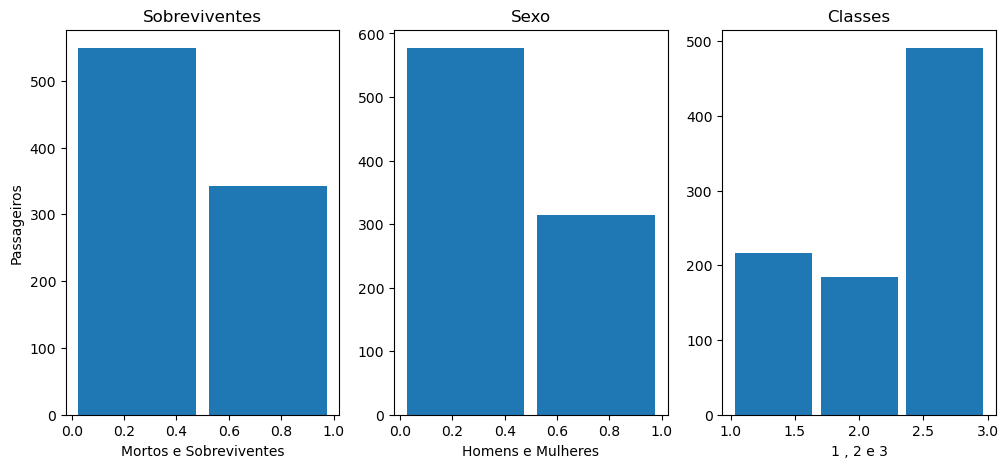

In [244]:
fig, ax = plt.subplots(1,3,figsize=(12,5))

ax[0].set_title('Sobreviventes')
ax[0].set_ylabel('Passageiros')
ax[0].set_xlabel('Mortos e Sobreviventes')
ax[0].hist(Base.Survived,2,rwidth=0.9)

ax[1].set_title('Sexo')
ax[1].set_xlabel('Homens e Mulheres')
ax[1].hist(Base.Sex,2,rwidth=0.9)

ax[2].set_title('Classes')
ax[2].set_xlabel('1 , 2 e 3')
ax[2].hist(Base.Pclass,3,rwidth=0.9)